In [1]:
#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------LIBRARIES---------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
from tensorflow.keras.models import load_model
from tensorflow.keras.datasets import mnist
from keras.utils.vis_utils import plot_model
import tensorflow as tf
import numpy as np
import os

#---------------------------------------------------------------------------------------CUDA RESOURCE CONTROL---------------------------------------------------------------------------------------
from tensorflow.python.client import device_lib
from numba import cuda

#-------------------------------------------------------------------------------------JUPYTER NOTEBOOK SETTINGS-------------------------------------------------------------------------------------
from ipynb.fs.full.train_cnn_mnist import performance
from IPython.core.display import display, HTML                                    
display(HTML("<style>.container { width:100% !important; }</style>"))     

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13521670782357330067
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 22385000448
locality {
  bus_id: 1
  links {
  }
}
incarnation: 5979404234052953957
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 4090, pci bus id: 0000:31:00.0, compute capability: 8.9"
xla_global_id: 416903419
]


In [2]:
#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------MODEL LOADING-------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
print(os.getcwd())
for file in os.listdir(os.getcwd()):
    if file.endswith(".h5"):
        #--------------------------------------------------------------------------GET FILE NAME AND MODEL SUMMARY----------------------------------------------------------------------------------
        print(file)
        net = load_model(file)
        net.summary()
        
        #-----------------------------------------------------------------------GENERATE NETWORK PLOT AND SAVE AS PNG-------------------------------------------------------------------------------
        plot_name = "plotted_models/plot_" + str(file.rsplit('/',1))[2:-5] + ".png"
        print(plot_name)
        plot_model(net, to_file = plot_name, show_shapes = True, show_layer_names = True)

F:\Academia\Kings_College_London\Semester_2\Deep_Learning_&_Neural_Networks\Coursework_I\MNIST_deeplearning_recognition
cnn_ensemble_mnist_99.73.h5
INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce RTX 4090, compute capability 8.9
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 cnn_model_1 (Sequential)       (None, 10)           1301642     ['input_1[0][0]']                
                                                                                                  
 c

Accuracy: 99.730000
Precision:  99.7307014644059
99.90, 99.74, 99.71, 99.70, 99.59, 99.66, 99.90, 99.61, 99.79, 99.70
Recall:  99.72621783417485
100.00, 99.91, 99.81, 99.90, 99.59, 99.78, 99.48, 99.81, 99.49, 99.50
F1 Score:  99.7283475273728
99.95, 99.82, 99.76, 99.80, 99.59, 99.72, 99.69, 99.71, 99.64, 99.60
Cohens kappa: 99.699882


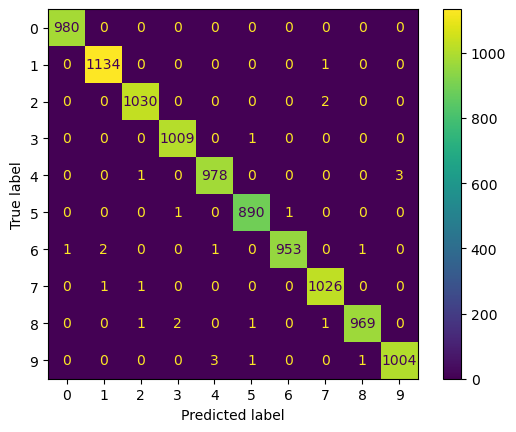

In [3]:
#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------SETUP CNN-----------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
conf = net.layers[0].get_config()
inshape = conf['batch_input_shape']
if inshape[1] == 28:
    netType = 'CNN'
else:
    netType = 'MLP'

#---------------------------------------------------------------------------------LOAD AND CURATE MNIST DATASET-------------------------------------------------------------------------------------
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_test = X_test.astype('float32')
X_test /= 255

#-------------------------------------------------------------------------------------DETERMINE MODEL TYPE------------------------------------------------------------------------------------------
if netType in ['MLP']:
    X_test = X_test.reshape(10000, 784)
else:
    X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

#----------------------------------------------------------------------------------PERSONAL ACCURACY METRICS----------------------------------------------------------------------------------------
performance(X_test, y_test, net, 0)

#---------------------------------------------------------------------------------KCL ACCURACY METRICS METHOD---------------------------------------------------------------------------------------
# outputs = net.predict(X_test)
# y_predicted = np.argmax(outputs, axis=1)
# correct_classified = sum(y_predicted == y_test)

# print('Percentage correctly classified MNIST=',100*correct_classified/y_test.size)

#---------------------------------------------------------------------------------RELEASE ALLOCATED RESOURCES---------------------------------------------------------------------------------------
tf.keras.backend.clear_session()
cuda.select_device(0)
cuda.close()